(<matplotlib.image.AxesImage at 0x20d800061c0>, (-0.5, 1439.5, 1079.5, -0.5))

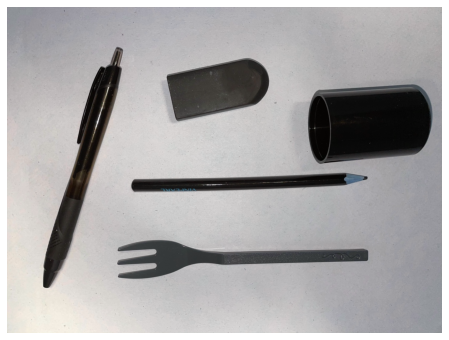

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('object_1.jpg')
plt.figure(figsize=(12,6))
plt.imshow(img, cmap='gray'), plt.axis('off')

In [3]:
import numpy as np

kernel = np.ones((15,15), np.uint8)
objects = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
kernel = np.ones((10, 10), np.uint8)
objects = cv2.morphologyEx(objects, cv2.MORPH_CLOSE, kernel)

(<matplotlib.image.AxesImage at 0x20d80356760>, (-0.5, 1439.5, 1079.5, -0.5))

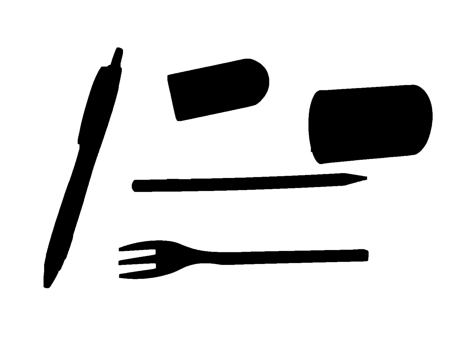

In [4]:
gray = cv2.cvtColor(objects, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(12,6))
plt.imshow(thresh, cmap='gray'), plt.axis('off')

In [15]:
thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [16]:
def labeling(img):
    h,w = img.shape
    label = np.zeros((h,w),np.uint8)
    count = 0

    for y in range(h):
        for x in range(w):
            if img[y,x] == 0:
                label_num = []
                encount = False
                mask = None

                if x == 0 and y == 0:
                    mask = [(y,x)]
                elif x == 0:
                    mask = [(y-1,x),(y-1,x+1),(y,x)]
                elif y == 0:
                    mask = [(y,x-1), (y,x)]
                elif x == w-1:
                    mask = [(y-1,x-1),(y-1,x),(y,x-1),(y,x)]
                else:
                    mask = [(y-1,x-1),(y-1,x),(y-1,x+1),(y,x-1),(y,x)]

                for pixel in mask:
                    if img[pixel] == 0:
                        if label[pixel] != 0:
                            encount = True
                            label_num.append(label[pixel])
                if encount:
                    label[y,x] = np.min(label_num)
                else:
                    count += 1
                    label[y,x] = count

                if len(label_num) > 1:
                    min_val = np.min(label_num)
                    for nums in label_num:
                        label[label == nums] = min_val
    return label

In [17]:
label = labeling(thresh)
np.unique(label)

array([  0,   1,   2,  62,  85, 108], dtype=uint8)

In [84]:
def coloring(label):
    kelly_colors = ['F2F3F4','222222','F3C300','875692','F38400','A1CAF1','BE0032','C2B280','848482','008856',
                    'E68FAC','0067A5','F99379','604E97','F6A600','B3446C','DCD300','882D17','8DB600','654522','E25822','2B3D26']
    h,w = label.shape
    clim = 255*np.ones([h,w,3],dtype=np.uint8)
    for y in range(h):
        for x in range(w):
            col = kelly_colors[label[y,x]%22]
            clim[y,x,:] = [int(col[0:2],base=16), int(col[2:4],base=16), int(col[4:6],base=16)]
    return plt.imshow(clim)

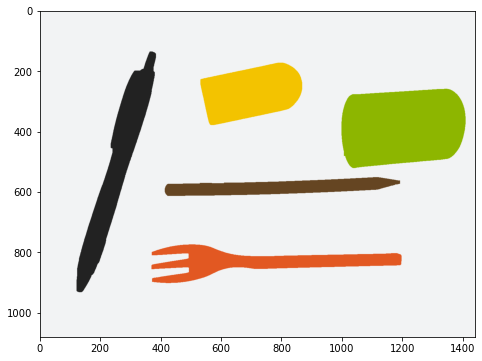

In [85]:
plt.figure(figsize=(12,6))
cimg = coloring(label)

(<matplotlib.image.AxesImage at 0x20d803b0be0>, (-0.5, 1439.5, 1079.5, -0.5))

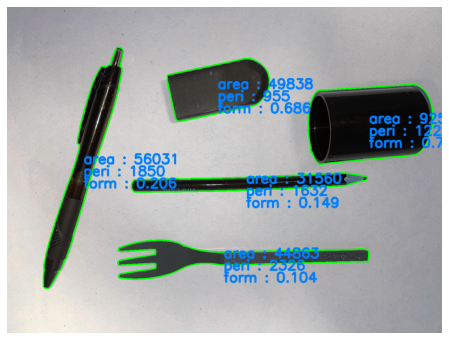

In [5]:
contours = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours[1][:-1]:
    
    img = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
    
    M = cv2.moments(cnt)
    center = (int(M["m10"] / M["m00"]),int(M["m01"] / M["m00"]))
    
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    form = (4*np.pi*area)/(perimeter**2)
    
    text = f"area : {int(area)}"
    text2 = f"peri : {int(perimeter)}"
    text3 = f"form : {round(form,3)}"

    img = cv2.putText(img, text, center, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,127,255), 5)
    img = cv2.putText(img, text2, (center[0],center[1]+40), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,127,255), 5)
    img = cv2.putText(img, text3, (center[0],center[1]+80), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,127,255), 5)

plt.figure(figsize=(12,6))    
plt.imshow(img), plt.axis('off')

(<matplotlib.image.AxesImage at 0x20d803f3c70>, (-0.5, 1439.5, 1080.5, -0.5))

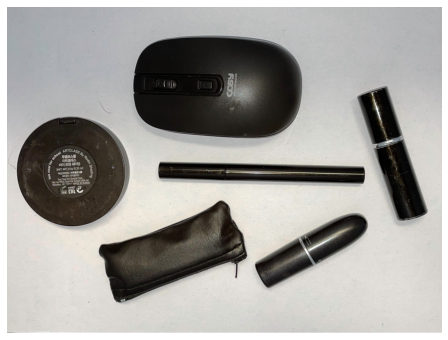

In [6]:
img = cv2.imread('object_2.jpg')
plt.figure(figsize=(12,6))
plt.imshow(img, cmap='gray'), plt.axis('off')

In [7]:
kernel = np.ones((30,30), np.uint8)
objects = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
kernel = np.ones((10, 10), np.uint8)
objects = cv2.morphologyEx(objects, cv2.MORPH_CLOSE, kernel)

(<matplotlib.image.AxesImage at 0x20d8004b3a0>, (-0.5, 1439.5, 1080.5, -0.5))

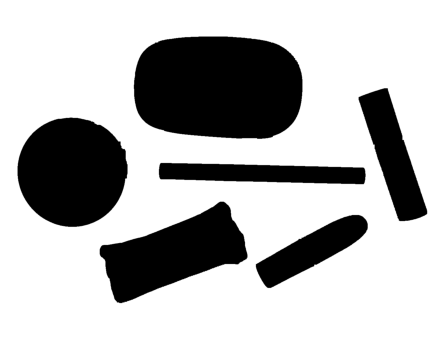

In [8]:
gray = cv2.cvtColor(objects, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(12,6))
plt.imshow(thresh, cmap='gray'), plt.axis('off')

In [21]:
label = labeling(thresh)
np.unique(label)

array([ 0,  1,  2, 92], dtype=uint8)

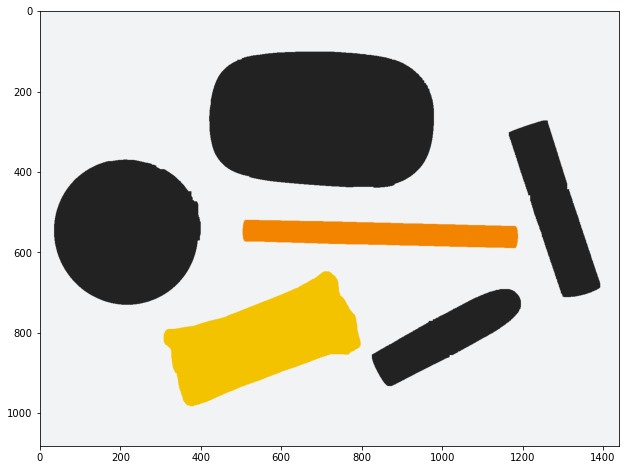

In [22]:
plt.figure(figsize=(12,6))
cimg = coloring(label)

In [18]:
contours[1][-1]

array([[[   0,    0]],

       [[   0, 1080]],

       [[1439, 1080]],

       [[1439,    0]]], dtype=int32)

(<matplotlib.image.AxesImage at 0x20d800a0850>, (-0.5, 1439.5, 1080.5, -0.5))

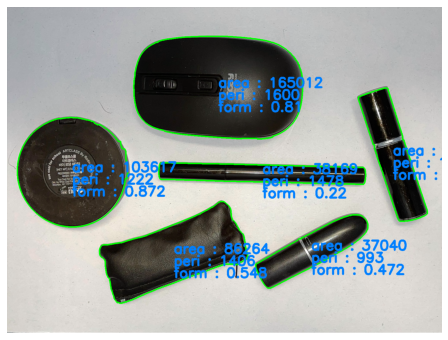

In [9]:
contours = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours[1][:-1]:

    img = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
    
    M = cv2.moments(cnt)
    center = (int(M["m10"] / M["m00"]),int(M["m01"] / M["m00"]))
    
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    form = (4*np.pi*area)/(perimeter**2)
    
    text = f"area : {int(area)}"
    text2 = f"peri : {int(perimeter)}"
    text3 = f"form : {round(form,3)}"

    img = cv2.putText(img, text, center, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,127,255), 5)
    img = cv2.putText(img, text2, (center[0],center[1]+40), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,127,255), 5)
    img = cv2.putText(img, text3, (center[0],center[1]+80), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,127,255), 5)

plt.figure(figsize=(12,6))    
plt.imshow(img), plt.axis('off')